In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import pynbody as pb
import numpy as np
import pandas as pd
import glob
import os
import h5py
import time
import tables
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
from natsort import natsorted
import importlib.util
import sys
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
import ast
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

os.chdir('/home/takeichi/MAP/halo_tracing_code_Nithun')
import halo_trace as ht
from halo_trace import tracing
file_path = '/home/takeichi/MAP/Code_Yuma_2025/Code/star_trace_Yuma.py'
module_name = 'star_trace'

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

pb.config['halo-class-priority'] = ['HaloNumberCatalogue', 'AHFCatalogue',
  'AmigaGrpCatalogue',
  'VelociraptorCatalogue',
  'SubFindHDFHaloCatalogue',
  'RockstarCatalogue',
  'SubfindCatalogue',
  'NewAdaptaHOPCatalogue',
  'NewAdaptaHOPCatalogueFullyLongInts',
  'AdaptaHOPCatalogue',
  'HOPCatalogue',
  'Gadget4SubfindHDFHaloCatalogue',
  'ArepoSubfindHDFCatalogue',
  'TNGSubfindHDFCatalogue']


In [3]:
infopath = "/home/takeichi/MAP/Code_Yuma_2025/Code/Datafiles/main_halo_com_329.csv"

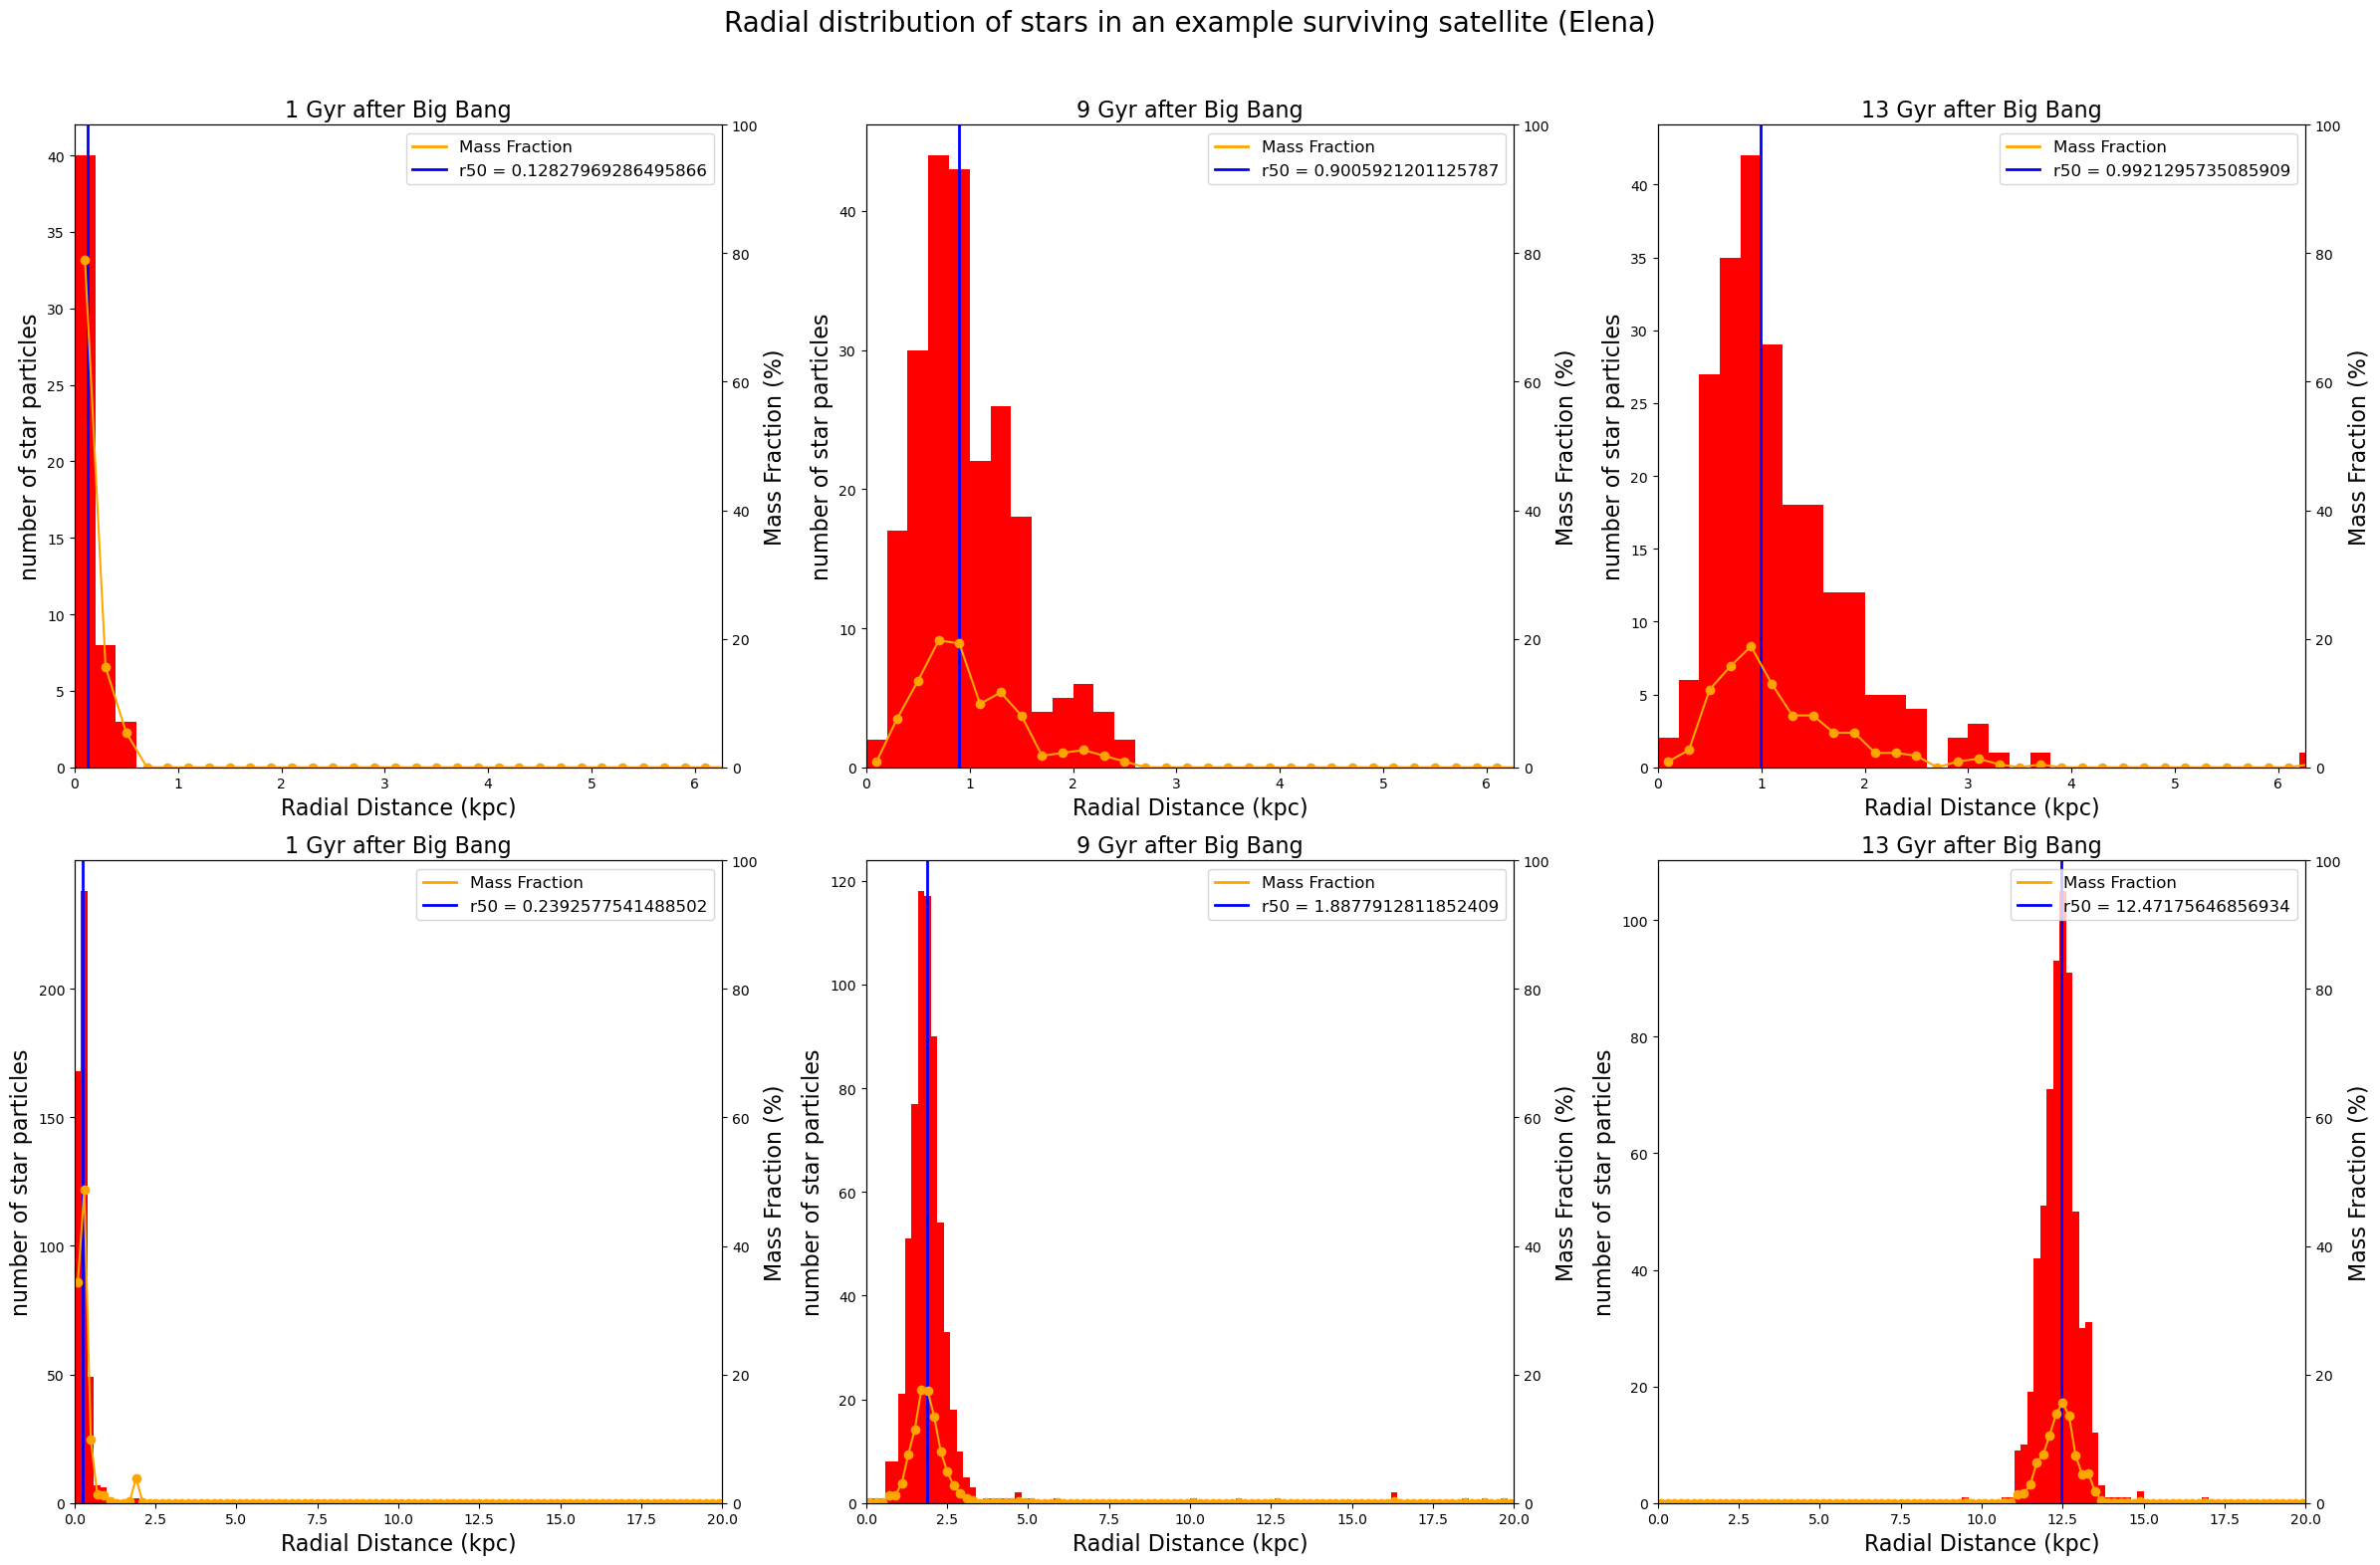

--> r_dist surviving plot saved successfully to: /home/takeichi/MAP/Results/329/r_dist_surviv_plots/r_dist_surviv_plots.svg


In [18]:
info_path = "/home/takeichi/MAP/Code_Yuma_2025/Code/Datafiles/main_halo_com_329.csv"
data_folder1="/home/takeichi/MAP/Results/329/004096_115"
data_folder2="/home/takeichi/MAP/Results/329/004096_117"
csv_path1=os.path.join(data_folder1, "halo_star_dist004096115.csv")
csv_path2=os.path.join(data_folder2, "halo_star_dist004096117.csv")
try:
    df=pd.read_csv(csv_path1)
except Exception as e:
    print(f"File loading error, {e}")
try:
    df1=pd.read_csv(csv_path2)
except Exception as e:
    print(f"File loading error, {e}")
output_dir = os.path.join("/home/takeichi/MAP/Results/329", "r_dist_surviv_plots")
os.makedirs(output_dir, exist_ok=True)

snapshotlist = [576,2880,4096]
r_array = []
for i, snap in enumerate(snapshotlist):
    snapshot_analyze = int(snap)
    #print(snapshot_analyze)
    a = f"{snapshot_analyze:06d}"
    try:
        main_csv_df = pd.read_csv(info_path)
        main_csv_snap = main_csv_df[main_csv_df["snapshot"] == int(a)]
        x_center, y_center, z_center = main_csv_snap[["0", "1", "2"]].iloc[0]
    except (FileNotFoundError, IndexError, KeyError) as e:
        print(f"Could not get main halo COM for snapshot {snapshot_analyze}. Skipping. Details: {e}")
        continue
    #print(df["snapshot"].unique())
    df_analyse = df[df["snapshot"] == snapshot_analyze]
    if not df_analyse.empty:
        x, y, z, xcom, ycom, zcom, mass = df_analyse[["particle_x", "particle_y", "particle_z", "halo_x_com", "halo_y_com", "halo_z_com", "particle_mass"]].values.T
        xcom_abs = xcom+x_center
        ycom_abs = ycom+y_center
        zcom_abs = zcom+z_center
        x_rel = x - xcom_abs
        y_rel = y - ycom_abs
        z_rel = z - zcom_abs
        r = np.sqrt(x_rel**2+y_rel**2+z_rel**2)
        r_array.extend(r)
        
r_max = np.max(r_array)
width = 0.2
bins=np.arange(0, r_max+width, width)
bins_ctr=(bins[:-1]+bins[1:])/2




r_array1 = []
for i, snap in enumerate(snapshotlist):
    snapshot_analyze = int(snap)
    #print(snapshot_analyze)
    a = f"{snapshot_analyze:06d}"
    try:
        main_csv_df = pd.read_csv(info_path)
        main_csv_snap = main_csv_df[main_csv_df["snapshot"] == int(a)]
        x_center, y_center, z_center = main_csv_snap[["0", "1", "2"]].iloc[0]
    except (FileNotFoundError, IndexError, KeyError) as e:
        print(f"Could not get main halo COM for snapshot {snapshot_analyze}. Skipping. Details: {e}")
        continue
    #print(df["snapshot"].unique())
    df_analyse = df1[df1["snapshot"] == snapshot_analyze]
    if not df_analyse.empty:
        x, y, z, xcom, ycom, zcom, mass = df_analyse[["particle_x", "particle_y", "particle_z", "halo_x_com", "halo_y_com", "halo_z_com", "particle_mass"]].values.T
        xcom_abs = xcom+x_center
        ycom_abs = ycom+y_center
        zcom_abs = zcom+z_center
        x_rel = x - xcom_abs
        y_rel = y - ycom_abs
        z_rel = z - zcom_abs
        r = np.sqrt(x_rel**2+y_rel**2+z_rel**2)
        r_array1.extend(r)
        
r_max1 = np.max(r_array1)
width = 0.2
bins1=np.arange(0, r_max1+width, width)
bins_ctr1=(bins1[:-1]+bins1[1:])/2








fig, axes = plt.subplots(2, 3, figsize=(24, 16))
ax2 = np.empty_like(axes, dtype=object)
fig.suptitle("Radial distribution of stars in an example surviving satellite (Elena)", fontsize=20, x=0.5, ha='center')

for i, snap in enumerate(snapshotlist):
    snapshot_analyze = int(snap)
    a = f"{snapshot_analyze:06d}"

    snap_path = "/data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/"
    halodata=pb.load(f"{snap_path}h329.cosmo50PLK.3072gst5HbwK1BH.{a}")
    halodata.physical_units()
    time_at_snap = halodata.properties["time"].in_units("Gyr")
    try:
        main_csv_df = pd.read_csv(info_path)
        main_csv_snap = main_csv_df[main_csv_df["snapshot"] == int(a)]
        x_center, y_center, z_center = main_csv_snap[["0", "1", "2"]].iloc[0]
    except (FileNotFoundError, IndexError, KeyError) as e:
        print(f"Could not get main halo COM for snapshot {snap}. Skipping. Details: {e}")
        continue
    
    df_analyse = df[df["snapshot"] == snapshot_analyze]
    if not df_analyse.empty:
        x, y, z, xcom, ycom, zcom, mass = df_analyse[["particle_x", "particle_y", "particle_z", "halo_x_com", "halo_y_com", "halo_z_com", "particle_mass"]].values.T
        xcom_abs = xcom+x_center
        ycom_abs = ycom+y_center
        zcom_abs = zcom+z_center
        x_rel = x - xcom_abs
        y_rel = y - ycom_abs
        z_rel = z - zcom_abs
        r = np.sqrt(x_rel**2+y_rel**2+z_rel**2)
            
        sorted_ind=np.argsort(r)
        cum_mass=np.cumsum(mass[sorted_ind])
        total_mass = cum_mass[-1]
        halfmass=total_mass/2
        r_50=r[sorted_ind][np.searchsorted(cum_mass, halfmass)]
    else:
        print("There is no stars.")
    axes[0,i].hist(r, bins=bins, color="red")
    axes[0,i].axvline(x=r_50, color="blue", linewidth=2)
    axes[0,i].set_xlim(0,r_max)
    axes[0,i].set_xlabel(f"Radial Distance (kpc)", fontsize=16) 
    axes[0,i].set_title(f"{int(time_at_snap)} Gyr after Big Bang", fontsize=16)
    ax2[0,i]=axes[0,i].twinx()
    if total_mass>0:
        mass_in_bin,_ =np.histogram(r, bins=bins, weights=mass)
        f_mass=mass_in_bin/total_mass*100
        ax2[0,i].plot(bins_ctr, f_mass, color="orange", marker='o', linestyle='-')
        ax2[0,i].set_ylim(0,100)
    
    legend_elements = [
    Line2D([0], [0], color='orange', label='Mass Fraction', lw=2),
    Line2D([0], [0], color='blue', label=f"r50 = {r_50}", lw=2),
    ]
    ax2[0,i].legend(handles=legend_elements, loc='best', fontsize=12)

for i, snap in enumerate(snapshotlist):
    snapshot_analyze = int(snap)
    a = f"{snapshot_analyze:06d}"

    snap_path = "/data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/"
    halodata=pb.load(f"{snap_path}h329.cosmo50PLK.3072gst5HbwK1BH.{a}")
    halodata.physical_units()
    time_at_snap = halodata.properties["time"].in_units("Gyr")
    try:
        main_csv_df = pd.read_csv(info_path)
        main_csv_snap = main_csv_df[main_csv_df["snapshot"] == int(a)]
        x_center, y_center, z_center = main_csv_snap[["0", "1", "2"]].iloc[0]
    except (FileNotFoundError, IndexError, KeyError) as e:
        print(f"Could not get main halo COM for snapshot {snap}. Skipping. Details: {e}")
        continue
    
    df_analyse = df1[df1["snapshot"] == snapshot_analyze]
    if not df_analyse.empty:
        x, y, z, xcom, ycom, zcom, mass = df_analyse[["particle_x", "particle_y", "particle_z", "halo_x_com", "halo_y_com", "halo_z_com", "particle_mass"]].values.T
        xcom_abs = xcom+x_center
        ycom_abs = ycom+y_center
        zcom_abs = zcom+z_center
        x_rel = x - xcom_abs
        y_rel = y - ycom_abs
        z_rel = z - zcom_abs
        r = np.sqrt(x_rel**2+y_rel**2+z_rel**2)
            
        sorted_ind=np.argsort(r)
        cum_mass=np.cumsum(mass[sorted_ind])
        total_mass = cum_mass[-1]
        halfmass=total_mass/2
        r_50=r[sorted_ind][np.searchsorted(cum_mass, halfmass)]
    else:
        print("There is no stars.")
    axes[1,i].hist(r, bins=bins1, color="red")
    axes[1,i].axvline(x=r_50, color="blue", linewidth=2)
    axes[1,i].set_xlim(0,20)
    axes[1,i].set_xlabel(f"Radial Distance (kpc)", fontsize=16) 
    axes[1,i].set_title(f"{int(time_at_snap)} Gyr after Big Bang", fontsize=16)
    ax2[1,i]=axes[1,i].twinx()
    if total_mass>0:
        mass_in_bin,_ =np.histogram(r, bins=bins1, weights=mass)
        f_mass=mass_in_bin/total_mass*100
        ax2[1,i].plot(bins_ctr1, f_mass, color="orange", marker='o', linestyle='-')

    
    legend_elements = [
    Line2D([0], [0], color='orange', label='Mass Fraction', lw=2),
    Line2D([0], [0], color='blue', label=f"r50 = {r_50}", lw=2),
    ]
    ax2[1,i].legend(handles=legend_elements, loc='best', fontsize=12)


    

for i in range(2):
    for l in range(3):
        axes[i,l].set_ylabel("number of star particles", fontsize=16) 
        ax2[i,l].set_ylabel("Mass Fraction (%)", fontsize=16)
        ax2[i,l].set_ylim(0,100)

fig.tight_layout(rect=[0, 0, 1, 0.96])
filename = f"r_dist_surviv_plots.svg"
output_path = os.path.join(output_dir, filename)
plt.savefig(output_path,
    format='svg',
    dpi=300,
    bbox_inches='tight',
    transparent=False)
plt.show()
print(f"--> r_dist surviving plot saved successfully to: {output_path}")